In [86]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from linear_regression import *

%reload_ext autoreload
%autoreload 2

In [87]:
# create dummy data for training
N = 5000
np.random.seed(123)

x = 10*np.random.rand(N)-5
x=np.array(x,dtype=np.float32)
x=x.reshape(-1, 1)

noise = 50*np.random.randn(N)
noise = np.array(noise, dtype=np.float32)
noise=noise.reshape(-1, 1)

x = torch.from_numpy(x)
noise = torch.from_numpy(noise)
# _x =  torch.cat([x, x**2],axis=1)
# noise = 0.1*x
# y = 7*x - 8
y = x**2

y_noise = y + noise 

x_train, x_test, y_train, y_test, y_noise_train, y_noise_test = train_test_split(x, y, y_noise, test_size=0.2, random_state=123)

X_train, X_val, Y_train, Y_val ,Y_noise_train, Y_noise_val= train_test_split(x_train, y_train, y_noise_train, test_size=0.25, random_state=123)


In [88]:
# Y_train.shape, Y_train
X_train

tensor([[ 0.7682],
        [-2.2356],
        [ 3.9775],
        ...,
        [-1.1315],
        [-4.9944],
        [ 2.6255]])

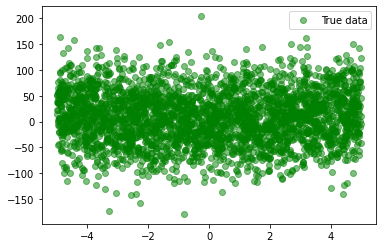

In [89]:
 predicted_plotting(X_train, Y_noise_train)

In [90]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.00001 
learningRate_re = 0.001 
epochs = 100
# epochs=30000
iters=200
model = QuadraticRegression(inputDim, outputDim)
# model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [91]:
# criterion = torch.nn.MSELoss() 
lambda_l2 = torch.nn.Parameter(torch.empty(1))
torch.nn.init.uniform_(lambda_l2)
# optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
optimizer = torch.optim.SGD([model.params['w1'],model.params['w2'], model.params['b']], lr=learningRate)
optimizer_re = torch.optim.SGD([lambda_l2], lr=learningRate_re)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=100,gamma=0.5)

# lambda_l2=-3.3661
# lambda_l2=0

In [92]:
## training steps
# train(model,epochs,optimizer, scheduler, X_train, Y_noise_train,X_val, Y_noise_val,lambda_l2)
# train(model,epochs,optimizer, X_train, Y_noise_train,X_val, Y_noise_val,lambda_l2)
train_with_regularization(model, iters,epochs, optimizer,optimizer_re, X_train,Y_noise_train,Y_train, X_val, Y_val, Y_noise_val, lambda_l2)
# train_with_regularization(model, iters,epochs, optimizer,optimizer_re, X_train,Y_noise_train,Y_train, X_val, Y_val, Y_noise_val, lambda_l2)

epoch 0, train_loss 1292.3460693359375
epoch 0, val_loss 460.6287536621094
epoch 1, train_loss 1292.3123779296875
epoch 1, val_loss 460.61724853515625
epoch 2, train_loss 1292.2786865234375
epoch 2, val_loss 460.60577392578125
epoch 3, train_loss 1292.244873046875
epoch 3, val_loss 460.59423828125
epoch 4, train_loss 1292.21142578125
epoch 4, val_loss 460.5828552246094
epoch 5, train_loss 1292.1781005859375
epoch 5, val_loss 460.5715026855469
epoch 6, train_loss 1292.144775390625
epoch 6, val_loss 460.56011962890625
epoch 7, train_loss 1292.111328125
epoch 7, val_loss 460.548828125
epoch 8, train_loss 1292.078125
epoch 8, val_loss 460.5374450683594
epoch 9, train_loss 1292.0450439453125
epoch 9, val_loss 460.5262145996094
epoch 10, train_loss 1292.01220703125
epoch 10, val_loss 460.5149841308594
epoch 11, train_loss 1291.9791259765625
epoch 11, val_loss 460.503662109375
epoch 12, train_loss 1291.9462890625
epoch 12, val_loss 460.49261474609375
epoch 13, train_loss 1291.9134521484375
ep

tensor([0.0577])


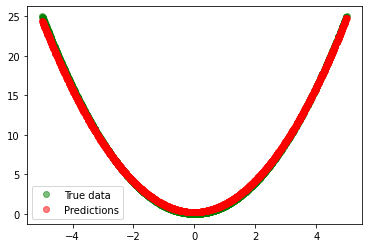

In [27]:
predicted = predicted_plotting(X_train, Y_train, model)

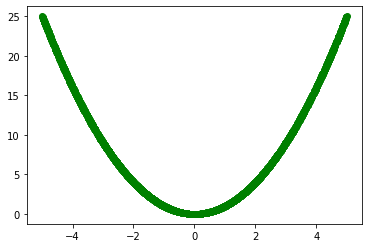

In [24]:
a = model(X_train).detach().numpy()
plt.plot(X_train, Y_train, 'go')
# plt.plot(X_train, , label='Predictions', alpha=0.5)

In [9]:
# print(list(model.parameters()))
print(list(model.params.values()))

[Parameter containing:
tensor([0.9757], requires_grad=True), Parameter containing:
tensor([0.0387], requires_grad=True), Parameter containing:
tensor([0.2358], requires_grad=True)]


In [10]:
print(lambda_l2)

Parameter containing:
tensor([8.9029e-15], requires_grad=True)
